What is the optimal balance between episode count, duration, and release schedule for maximizing both viewership and critical acclaim?

Impact: Identifying the sweet spot in production choices helps balance cost-effectiveness with audience satisfaction and engagement.

Key Attributes to Analyze: Episodes, Time Per ep (Min)a, Status, Score, Scored By, Popularity.

In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

from PATHS import HOME, DATASET_PATH, ANIME_DATASET_2023, DATA_PREPROCESSING

In [2]:
print('HOME', HOME)
print('DATASET FOLDER', DATASET_PATH)
print('ANIME DATASET 2023', ANIME_DATASET_2023)
print('DATA PREPROCESSING', DATA_PREPROCESSING)

HOME d:\Data Science Programming\Project
DATASET FOLDER d:\Data Science Programming\Project\raw_animes_dataset
ANIME DATASET 2023 d:\Data Science Programming\Project\raw_animes_dataset\anime-dataset-2023.csv
DATA PREPROCESSING d:\Data Science Programming\Project\Data Preprocessing


In [3]:
anime_clean_df = pd.read_csv(os.path.join(DATA_PREPROCESSING, 'anime-data-preprocessing.csv'))
anime_clean_df

,Name,Score,Genres,Synopsis,Type,Episodes,Producers,Studios,Source,Time per ep (Min),Rating,Rank,Popularity,Favorites,Scored By,Members,Released date,Completed date
0,Fullmetal Alchemist: Brotherhood,9.10,"Action, Adventure, Drama, Fantasy",After a horrific alchemy experiment goes wrong...,TV,64.0,"Aniplex, Square Enix, Mainichi Broadcasting Sy...",Bones,Manga,24.00,R - 17+ (violence & profanity),1,3,217606,2020030,3176556,2009-04-05,2010-07-04
1,Steins;Gate,9.07,"Drama, Sci-Fi, Suspense",Eccentric scientist Rintarou Okabe has a never...,TV,24.0,"Frontier Works, Media Factory, Kadokawa Shoten...",White Fox,Visual novel,24.00,PG-13 - Teens 13 or older,2,13,182964,1336233,2440369,2011-04-06,2011-09-14
2,Bleach: Sennen Kessen-hen,9.07,"Action, Adventure, Fantasy",Substitute Soul Reaper Ichigo Kurosaki spends ...,TV,13.0,"TV Tokyo, Aniplex, Dentsu, Shueisha",Pierrot,Manga,24.00,R - 17+ (violence & profanity),3,464,17999,213872,445198,2022-10-11,2022-12-27
3,Gintama°,9.06,"Action, Comedy, Sci-Fi","Gintoki, Shinpachi, and Kagura return as the f...",TV,51.0,"TV Tokyo, Aniplex, Dentsu",Bandai Namco Pictures,Manga,24.00,PG-13 - Teens 13 or older,4,331,15947,237957,595767,2015-04-08,2016-03-30
4,Shingeki no Kyojin Season 3 Part 2,9.05,"Action, Drama",Seeking to restore humanity's diminishing hope...,TV,10.0,"Production I.G, Dentsu, Mainichi Broadcasting ...",Wit Studio,Manga,23.00,R - 17+ (violence & profanity),5,24,55245,1471825,2104016,2019-04-29,2019-07-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13915,Kokuhaku,2.30,Horror,"Beside a certain building, a girl appears to m...",ONA,1.0,UNKNOWN,UNKNOWN,Original,0.67,R - 17+ (violence & profanity),13916,7105,17,4904,6697,2015-08-27,2015-08-27
13916,Hametsu no Mars,2.22,"Horror, Sci-Fi",Several months after a probe returning from Ma...,OVA,1.0,"Idea Factory, King Records, Design Factory",WAO World,Visual novel,19.00,R - 17+ (violence & profanity),13917,2512,295,47630,65622,2005-07-06,2005-07-06
13917,Tsui no Sora,2.22,Hentai,"After the sudden death of a student, mysteriou...",OVA,1.0,Obtain Future,UNKNOWN,Visual novel,23.00,Rx - Hentai,13918,7563,24,3436,5713,2002-08-10,2002-08-10
13918,Utsu Musume Sayuri,1.98,"Avant Garde, Comedy",Sayuri is a curious creature who lives on her ...,OVA,1.0,UNKNOWN,UNKNOWN,Original,3.00,R+ - Mild Nudity,13919,4492,50,15873,20789,2003-01-01,2003-01-01


Data Preprocessing

In [4]:
anime_clean_df.keys()

Index(['Name', 'Score', 'Genres', 'Synopsis', 'Type', 'Episodes', 'Producers',
       'Studios', 'Source', 'Time per ep (Min)', 'Rating', 'Rank',
       'Popularity', 'Favorites', 'Scored By', 'Members', 'Released date',
       'Completed date'],
      dtype='object')

In [5]:
filtered_df = anime_clean_df[['Episodes', 'Time per ep (Min)', 'Released date', 'Completed date', 'Score' ,'Scored By', 'Popularity']]
filtered_df

,Episodes,Time per ep (Min),Released date,Completed date,Score,Scored By,Popularity
0,64.0,24.00,2009-04-05,2010-07-04,9.10,2020030,3
1,24.0,24.00,2011-04-06,2011-09-14,9.07,1336233,13
2,13.0,24.00,2022-10-11,2022-12-27,9.07,213872,464
3,51.0,24.00,2015-04-08,2016-03-30,9.06,237957,331
4,10.0,23.00,2019-04-29,2019-07-01,9.05,1471825,24
...,...,...,...,...,...,...,...
13915,1.0,0.67,2015-08-27,2015-08-27,2.30,4904,7105
13916,1.0,19.00,2005-07-06,2005-07-06,2.22,47630,2512
13917,1.0,23.00,2002-08-10,2002-08-10,2.22,3436,7563
13918,1.0,3.00,2003-01-01,2003-01-01,1.98,15873,4492


In [6]:
# Kiểm tra các cột có giá trị Unknown hoặc UNKNOWN
unknown_columns = []

for column in filtered_df.columns:
    if filtered_df[column].isin(['Unknown', 'UNKNOWN']).any():
        unknown_columns.append(column)

# In ra danh sách các cột có giá trị Unknown hoặc UNKNOWN
print("Các cột có giá trị 'Unknown' hoặc 'UNKNOWN':")
print(unknown_columns)

Các cột có giá trị 'Unknown' hoặc 'UNKNOWN':
[]


In [7]:
filtered_df.isnull().sum()

Episodes             0
Time per ep (Min)    0
Released date        0
Completed date       0
Score                0
Scored By            0
Popularity           0
dtype: int64

In [8]:
# Xem kiểu dữ liệu của các cột trong filtered_df
filtered_df.dtypes

Episodes             float64
Time per ep (Min)    float64
Released date         object
Completed date        object
Score                float64
Scored By              int64
Popularity             int64
dtype: object

In [9]:
filtered_df['Total Duration'] = filtered_df['Time per ep (Min)'] * filtered_df['Episodes']
filtered_df

C:\Users\MINH HUNG\AppData\Local\Temp\ipykernel_8256\2798716943.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['Total Duration'] = filtered_df['Time per ep (Min)'] * filtered_df['Episodes']


,Episodes,Time per ep (Min),Released date,Completed date,Score,Scored By,Popularity,Total Duration
0,64.0,24.00,2009-04-05,2010-07-04,9.10,2020030,3,1536.00
1,24.0,24.00,2011-04-06,2011-09-14,9.07,1336233,13,576.00
2,13.0,24.00,2022-10-11,2022-12-27,9.07,213872,464,312.00
3,51.0,24.00,2015-04-08,2016-03-30,9.06,237957,331,1224.00
4,10.0,23.00,2019-04-29,2019-07-01,9.05,1471825,24,230.00
...,...,...,...,...,...,...,...,...
13915,1.0,0.67,2015-08-27,2015-08-27,2.30,4904,7105,0.67
13916,1.0,19.00,2005-07-06,2005-07-06,2.22,47630,2512,19.00
13917,1.0,23.00,2002-08-10,2002-08-10,2.22,3436,7563,23.00
13918,1.0,3.00,2003-01-01,2003-01-01,1.98,15873,4492,3.00


Exploratory Data Analysis (EDA)

Analyze Score and Popularity Trends:

Plot Score and Popularity against Episodes, Duration, and Total Duration.

Analyze the distribution of scores and popularity across seasons and years.

Identify outliers (e.g., very long or short anime) and assess their performance.

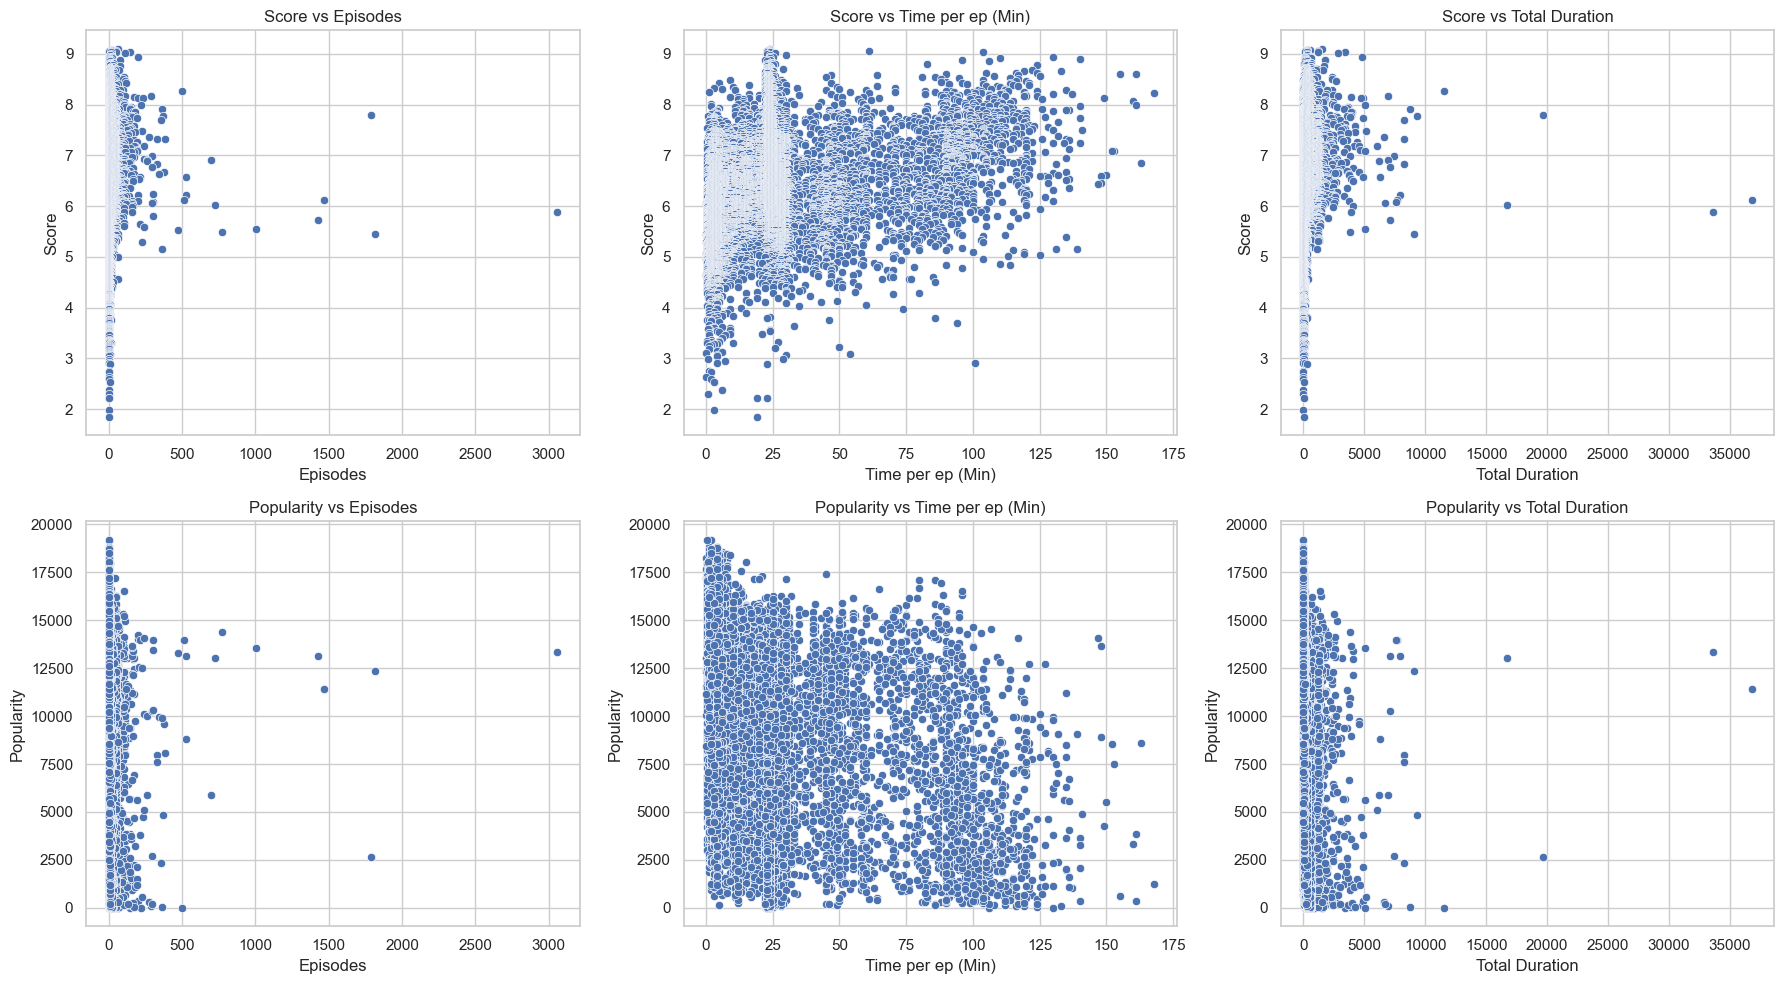

In [10]:
# Thiết lập phong cách biểu đồ với Seaborn
sns.set(style="whitegrid")

# Vẽ biểu đồ Score và Popularity so với Episodes, Duration, và Total Duration

fig, axes = plt.subplots(2, 3, figsize=(18, 10))

# Biểu đồ Score vs Episodes
sns.scatterplot(x='Episodes', y='Score', data=filtered_df, ax=axes[0, 0])
axes[0, 0].set_title('Score vs Episodes')

# Biểu đồ Score vs Duration
sns.scatterplot(x='Time per ep (Min)', y='Score', data=filtered_df, ax=axes[0, 1])
axes[0, 1].set_title('Score vs Time per ep (Min)')

# Biểu đồ Score vs Total Duration
sns.scatterplot(x='Total Duration', y='Score', data=filtered_df, ax=axes[0, 2])
axes[0, 2].set_title('Score vs Total Duration')

# Biểu đồ Popularity vs Episodes
sns.scatterplot(x='Episodes', y='Popularity', data=filtered_df, ax=axes[1, 0])
axes[1, 0].set_title('Popularity vs Episodes')

# Biểu đồ Popularity vs Duration
sns.scatterplot(x='Time per ep (Min)', y='Popularity', data=filtered_df, ax=axes[1, 1])
axes[1, 1].set_title('Popularity vs Time per ep (Min)')

# Biểu đồ Popularity vs Total Duration
sns.scatterplot(x='Total Duration', y='Popularity', data=filtered_df, ax=axes[1, 2])
axes[1, 2].set_title('Popularity vs Total Duration')

# Điều chỉnh khoảng cách giữa các biểu đồ
plt.tight_layout()
plt.show()

In [11]:
# Tính toán ma trận tương quan giữa các cột có liên quan
correlation_matrix = filtered_df[['Episodes', 'Time per ep (Min)', 'Total Duration', 'Score', 'Scored By', 'Popularity']].corr()

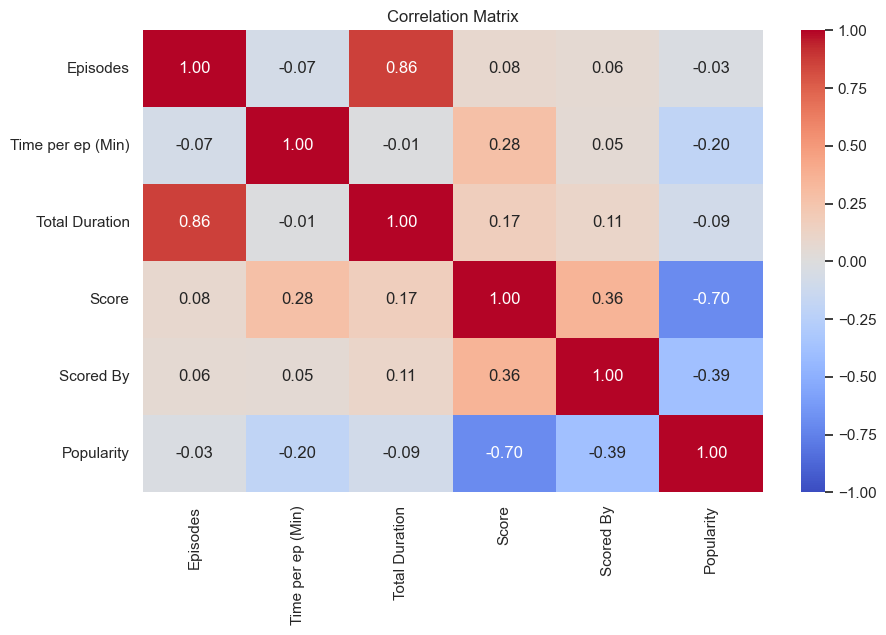

In [12]:
# Vẽ heatmap cho ma trận tương quan
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', vmin=-1, vmax=1)
plt.title('Correlation Matrix')
plt.show()

Chất lượng không đồng nghĩa với sự phổ biến: Một anime có điểm số cao không nhất thiết phải là một anime được nhiều người xem. Có thể một số anime chất lượng cao (theo đánh giá của người xem) nhưng lại không được biết đến rộng rãi hoặc không thu hút đông đảo khán giả.

Phổ biến không đồng nghĩa với chất lượng: Các anime phổ biến có thể không phải lúc nào cũng có chất lượng đánh giá tốt. Đôi khi, anime được nhiều người xem không phải vì nó hay, mà vì nó dễ tiếp cận hoặc vì lý do marketing, tên tuổi, hoặc thương hiệu.

In [13]:
numeric_cols = filtered_df.select_dtypes(include=['number']).columns
performance = filtered_df.groupby(pd.cut(filtered_df['Episodes'], bins=[0, 12, 24, 50, 100]))[numeric_cols].mean()
performance


C:\Users\MINH HUNG\AppData\Local\Temp\ipykernel_8256\383926936.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  performance = filtered_df.groupby(pd.cut(filtered_df['Episodes'], bins=[0, 12, 24, 50, 100]))[numeric_cols].mean()


,Episodes,Time per ep (Min),Score,Scored By,Popularity,Total Duration
Episodes,,,,,,
"(0, 12]",3.640959,28.629376,6.324340,25084.326612,7883.949731,78.716670
"(12, 24]",16.563286,18.830807,6.860074,80439.703923,5164.829756,312.053546
"(24, 50]",32.917224,20.848662,6.893896,51263.425585,7063.125418,687.014097
"(50, 100]",59.297593,20.937834,6.780941,26628.256018,8088.612691,1235.068359


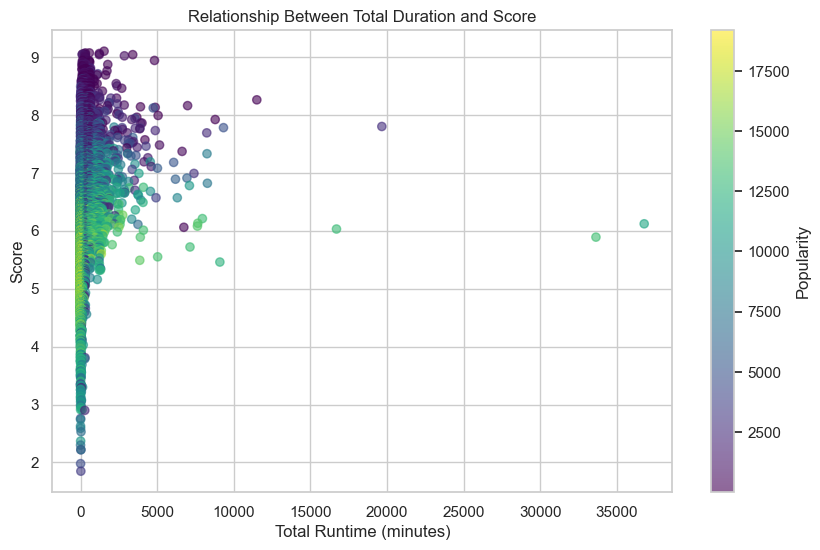

In [14]:
# Plot the results
plt.figure(figsize=(10, 6))
plt.scatter(filtered_df['Total Duration'], filtered_df['Score'], alpha=0.6, c=filtered_df['Popularity'], cmap='viridis')
plt.colorbar(label='Popularity')
plt.xlabel('Total Runtime (minutes)')
plt.ylabel('Score')
plt.title('Relationship Between Total Duration and Score')
plt.show()

In [15]:
# Apply clustering
kmeans = KMeans(n_clusters=3)
filtered_df['Cluster'] = kmeans.fit_predict(filtered_df[['Episodes', 'Time per ep (Min)', 'Score']])

for cluster_num in filtered_df['Cluster'].unique():
    cluster_data = filtered_df[filtered_df['Cluster'] == cluster_num]
    print(f"Cluster {cluster_num}:")
    print(cluster_data[['Score', 'Episodes', 'Time per ep (Min)']].describe())

Cluster 0:
              Score      Episodes  Time per ep (Min)
count  12346.000000  12346.000000       12346.000000
mean       6.396761     12.515309          18.822400
std        0.918387     27.607278          11.538195
min        1.850000      1.000000           0.100000
25%        5.780000      1.000000           7.000000
50%        6.410000      4.000000          23.000000
75%        7.060000     13.000000          25.000000
max        9.100000    773.000000          53.000000
Cluster 1:
            Score     Episodes  Time per ep (Min)
count  1568.00000  1568.000000        1568.000000
mean      6.84662     1.052296          88.320791
std       0.88915     0.353406          20.709090
min       2.91000     1.000000          53.000000
25%       6.23000     1.000000          72.000000
50%       6.94000     1.000000          90.000000
75%       7.47000     1.000000         100.000000
max       9.05000     7.000000         168.000000
Cluster 2:
          Score     Episodes  Time per e

C:\Users\MINH HUNG\AppData\Local\Temp\ipykernel_8256\1491130363.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['Cluster'] = kmeans.fit_predict(filtered_df[['Episodes', 'Time per ep (Min)', 'Score']])


In [16]:
# Generate recommendations
high_perf_clusters = filtered_df[filtered_df['Cluster'] == 0]
print("Recommended Episode Count and Duration:")
print(high_perf_clusters[['Episodes', 'Time per ep (Min)']].describe())

Recommended Episode Count and Duration:
           Episodes  Time per ep (Min)
count  12346.000000       12346.000000
mean      12.515309          18.822400
std       27.607278          11.538195
min        1.000000           0.100000
25%        1.000000           7.000000
50%        4.000000          23.000000
75%       13.000000          25.000000
max      773.000000          53.000000


Phân bố số tập:

Phần lớn anime có số tập tương đối ngắn (trung vị là 4 tập).
Một số ít series có số tập rất lớn, như 773 tập, làm tăng giá trị trung bình (12.5) cao hơn so với trung vị (4).
Thời lượng mỗi tập:

Anime thường có thời lượng tập trung bình khoảng 18.8 phút, với phần lớn các tập kéo dài khoảng 23 phút trở xuống.
Thời lượng tập dài hơn (đến 53 phút) hoặc cực ngắn (dưới 7 phút) ít phổ biến hơn, thường là những trường hợp đặc biệt.
Ứng dụng:

Để tối ưu hóa cho cả người xem và sản xuất, tập trung vào anime có số tập từ 4–13 tập và thời lượng mỗi tập từ 23–25 phút sẽ là một lựa chọn tốt.